# Name : Hermansyah
# Cohort : June 2022
# Assignment : Melanoma Detection Assignment - CNN




Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

## Data Preparation

Here we prepared all data related for the CNN, for example importing libraries, dataset, etc

### Importing all the important libraries

In [5]:
# We import all the needed libraries for the CNN algorithm

import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### Importing Skin Cancer Data

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [6]:
# We stored the dataset source in Google Drive. So this below syntax was intended to read directory in user GDrive

from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [7]:
# Defining the path for train and test images (all the files are stored in GDrive )

data_dir_train = pathlib.Path("/content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path("/content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Test/")

In [8]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

# In total we do have 2357 images as input. With 2239 images are considered training dataset and the remaining as test dataset

2239
118


### Create a dataset

Here, we defined the dataset to be proceeded in the next steps

In [9]:
batch_size = 32
img_height = 180
img_width = 180

In [10]:
# here we defined the image dataset using keras and parameters as above, such as batch_size = 32, etc
image_dataset = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=batch_size,image_size=(img_height,img_width),
                                                                    label_mode='categorical',seed=123)

#label_mode is categorial, with the defined batch_size and num_classes,
#here we used one-hot encoding

Found 18225 files belonging to 9 classes.


In [11]:
## Use 80% of the images for training, and 20% for validation.
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size=batch_size,
                                                               image_size=(img_height,img_width), label_mode='categorical',
                                                               seed=123,subset="training",
                                                               validation_split=0.2)

#label_mode is categorial, with the defined batch_size and num_classes,
#here we used one-hot encoding

Found 18225 files belonging to 9 classes.
Using 14580 files for training.


In [12]:
## Use 80% of the images for training, and 20% for validation.
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size=batch_size,
                                                               image_size=(img_height,img_width), label_mode='categorical',
                                                               seed=123,subset="validation",
                                                               validation_split=0.2)

#label_mode is categorial, with the defined batch_size and num_classes,
#here we used one-hot encoding

Found 18225 files belonging to 9 classes.
Using 3645 files for validation.


In [13]:
# List out all the classes of skin cancer and store them in a list.
# Here we can see there are 9 skin disease (class names)
class_names = train_ds.class_names
print(class_names)
print('Total Classes',len(class_names))

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
Total Classes 9


In [14]:
#total all files directories
len(train_ds.file_paths)

14580

## Visualize the data
#### Create a code to visualize one instance of all the nine classes present in the dataset

Found 15725 files belonging to 9 classes.


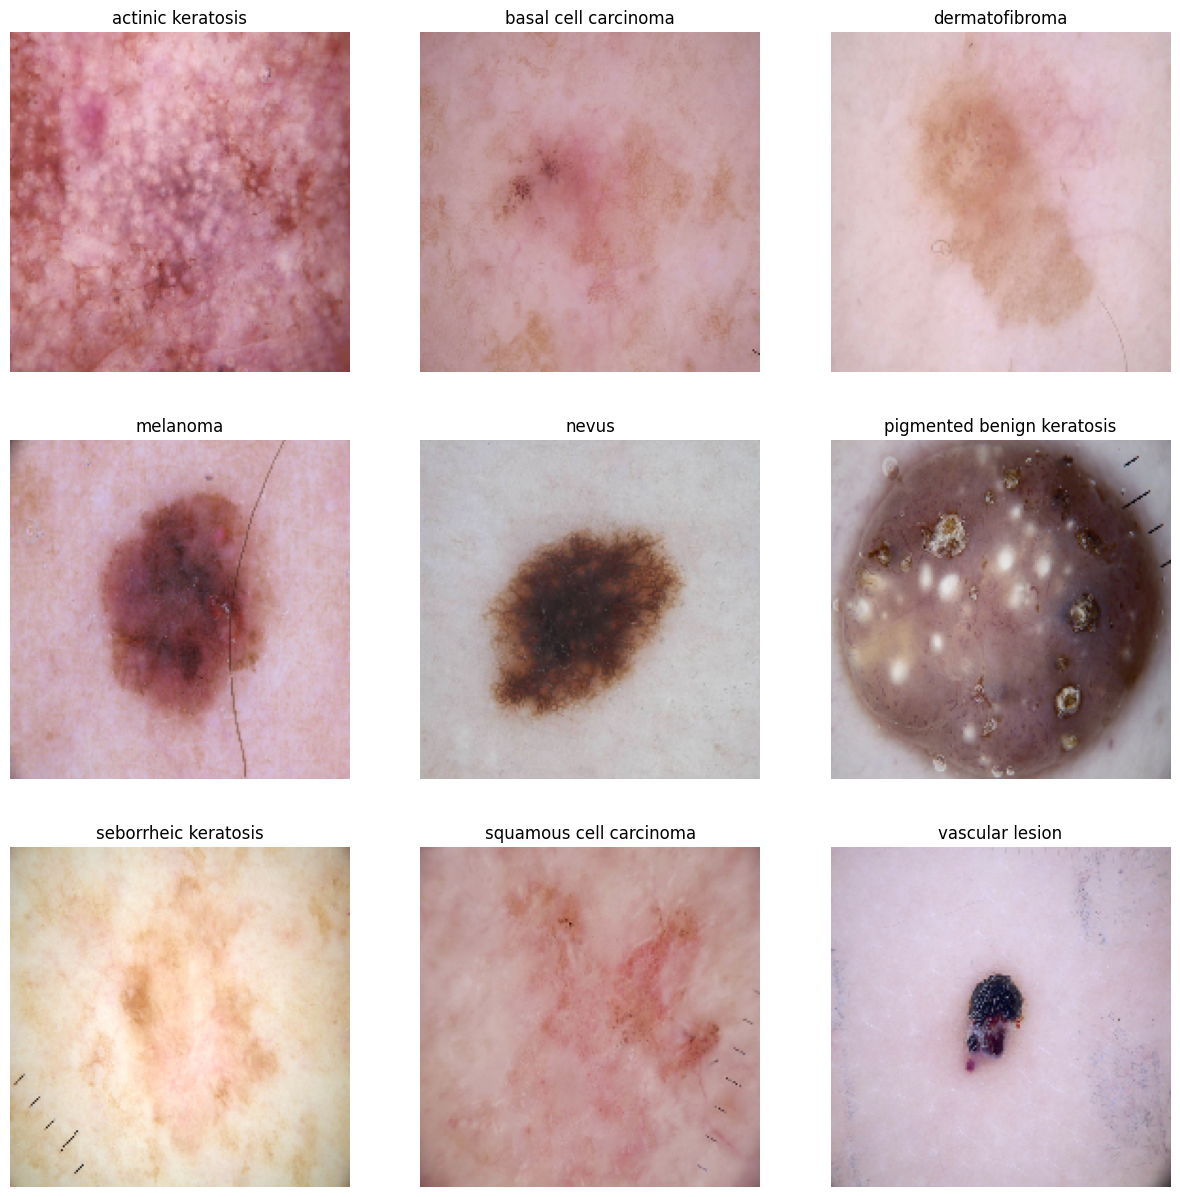

In [25]:
#Visualize one instance of all the class present in the dataset.


image_dataset = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,image_size=(180,180),
                                                                    label_mode='categorical',seed=123)

#Define all the classes of Skin Cancer
class_names = image_dataset.class_names

# below is the code to create a dataframe of the directory and class names
i=0
dat_f =pd.DataFrame()
for c in class_names:
  function_dir = lambda x:str(data_dir_train)+'/'+c+'/'+x
  input = os.listdir(str(data_dir_train)+'/'+c)
  list_dir = list(map(function_dir,input))
  cls = [c]
  cls = cls*len(list_dir)

  if i==0:
    dat_f =pd.DataFrame()
    df2=pd.DataFrame(cls, columns=['class'])
    df1=pd.DataFrame(list_dir, columns=['url'])
    df3=pd.DataFrame(input, columns=['file_name'])
    dat_f=pd.concat([df2,df1,df3],axis=1,ignore_index=True)

  df2=pd.DataFrame(cls, columns=['class'])
  df1=pd.DataFrame(list_dir, columns=['url'])
  df3=pd.DataFrame(input, columns=['file_name'])
  
  dat_combine=pd.concat([df2,df1,df3],axis=1, ignore_index=True)
  dat_f=pd.concat([dat_f,dat_combine],axis=0, ignore_index=True)

  i+=1
dat_f = dat_f.rename(columns={0: 'class_name', 1: 'directory', 2:'file_name'})
dat_f.head()
    
#After we mapped the class name and image, we then visualized image below by having 1 image for 1 class name 
plt.figure(figsize=(15,15))
index = 0
for c in class_names:
    path_list = list(dat_f[(dat_f.class_name==c)]['directory'][:2])
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(180,180)))
    plt.title(c)
    plt.axis("off")

In [26]:
#Since we have created DataFrame for the directory and class name, here we show the table
dat_f.head()

,class_name,directory,file_name
0,actinic keratosis,/content/gdrive/MyDrive/CNN/Skin cancer ISIC T...,ISIC_0025953.jpg
1,actinic keratosis,/content/gdrive/MyDrive/CNN/Skin cancer ISIC T...,ISIC_0026525.jpg
2,actinic keratosis,/content/gdrive/MyDrive/CNN/Skin cancer ISIC T...,ISIC_0028558.jpg
3,actinic keratosis,/content/gdrive/MyDrive/CNN/Skin cancer ISIC T...,ISIC_0026171.jpg
4,actinic keratosis,/content/gdrive/MyDrive/CNN/Skin cancer ISIC T...,ISIC_0027650.jpg


In [27]:
# From below code we can see an imbalanced class and Pigmented and Melanoma are the highest ones
print('Number of Cases by Class Name')
dat_f.groupby('class_name')['file_name'].count().sort_values(ascending = False)

Number of Cases by Class Name


class_name
pigmented benign keratosis    463
melanoma                      439
basal cell carcinoma          377
nevus                         358
actinic keratosis             230
squamous cell carcinoma       182
vascular lesion               140
dermatofibroma                 96
seborrheic keratosis           78
Name: file_name, dtype: int64

In [28]:
# As per below contribution, Pigmented Benign Keratosis and Melanoma have contributed almoost ~40% of population
print('Contribution of Cases by Class Name')
dat_f.groupby('class_name')['file_name'].count().sort_values(ascending = False)/dat_f['file_name'].count()

Contribution of Cases by Class Name


class_name
pigmented benign keratosis    0.195937
melanoma                      0.185781
basal cell carcinoma          0.159543
nevus                         0.151502
actinic keratosis             0.097334
squamous cell carcinoma       0.077021
vascular lesion               0.059247
dermatofibroma                0.040626
seborrheic keratosis          0.033009
Name: file_name, dtype: float64

In [29]:
new_dat = pd.DataFrame(dat_f.groupby('class_name')['file_name'].count().sort_values(ascending = False)/dat_f['file_name'].count())
new_dat = new_dat.rename(columns={'class_name': 'class_name', 'file_name': 'contribution_pct'})
new_dat = new_dat.reset_index()

<Axes: xlabel='class_name', ylabel='contribution_pct'>

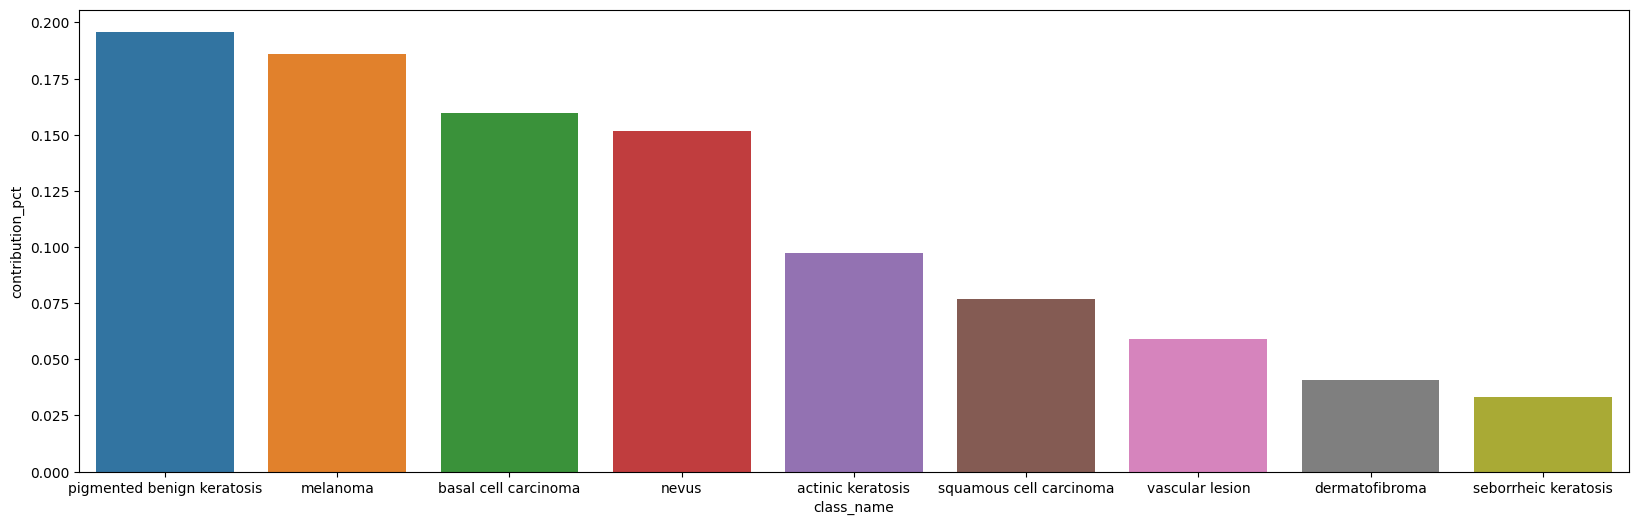

In [30]:
# Below is the visualization of the skin disease contribution
import seaborn as sns
plt.figure(figsize=(20, 6))
sns.barplot(x="class_name", y="contribution_pct", data=new_dat)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [31]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Model Development (First Iteration)
#### Here we created which can accurately detect 9 classes present in the dataset. We also normalized the pixel value

### Create The CNN Model

In [17]:
# In summary, for the first trial, we used 3 Convulation layer with pooling (2,3). We didnt use dropouts or regularization in the first trial.
# The activation function that we used is RelU and Softmax at the end because it's a classification problem.

model = Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))

#First Convulation layer
model.add(layers.Conv2D(16,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(64,activation='relu'))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 64)        1

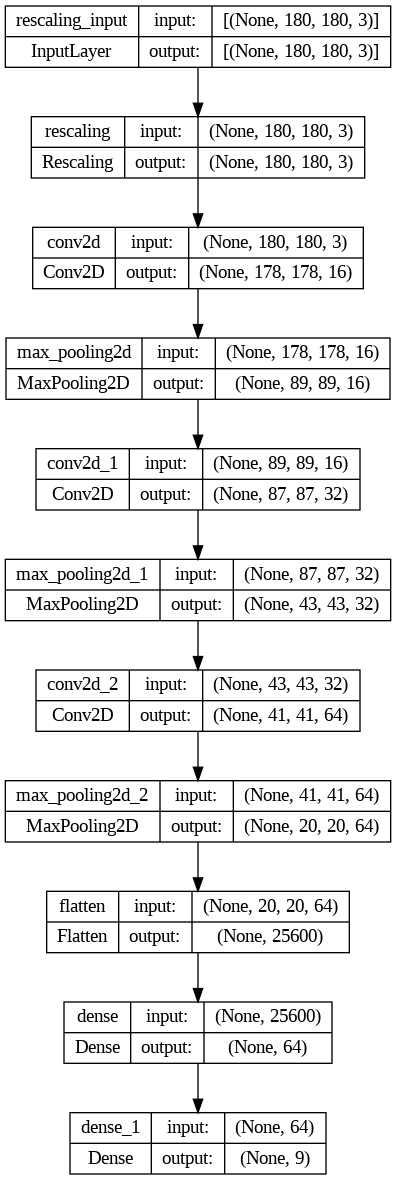

In [18]:
# Below, we showed the overall/summary of our CNN architecture based on the model hyperparameter we defined above
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [33]:
#Adam optimization: is a stochastic gradient descent method
#categorical_crossentropy: It's a loss function for multi-class classification model

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


### Train the model

In [35]:
# In this first trial, we run based on 20 epochs and concluded the result
epochs = 20

history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/20
394/394 [==============================] - 46s 31ms/step - loss: 1.7917 - accuracy: 0.3030 - val_loss: 1.3240 - val_accuracy: 0.5211
Epoch 2/20
394/394 [==============================] - 4s 11ms/step - loss: 1.2275 - accuracy: 0.5451 - val_loss: 1.0875 - val_accuracy: 0.6114
Epoch 3/20
394/394 [==============================] - 4s 11ms/step - loss: 0.9714 - accuracy: 0.6469 - val_loss: 0.9184 - val_accuracy: 0.6760
Epoch 4/20
394/394 [==============================] - 4s 11ms/step - loss: 0.7311 - accuracy: 0.7388 - val_loss: 0.6616 - val_accuracy: 0.7730
Epoch 5/20
394/394 [==============================] - 4s 11ms/step - loss: 0.5969 - accuracy: 0.7917 - val_loss: 0.6358 - val_accuracy: 0.7742
Epoch 6/20
394/394 [==============================] - 4s 11ms/step - loss: 0.4620 - accuracy: 0.8383 - val_loss: 0.5043 - val_accuracy: 0.8267
Epoch 7/20
394/394 [==============================] - 4s 11ms/step - loss: 0.3542 - accuracy: 0.8785 - val_loss: 0.4604 - val_accuracy: 0.850

From the result above, we can see that the accuracy is pretty high 0.94, but the gap with validation accuracy is quite high (0nly 0.8). Therefore, here we suspected there's overfitting

### Visualizing training results

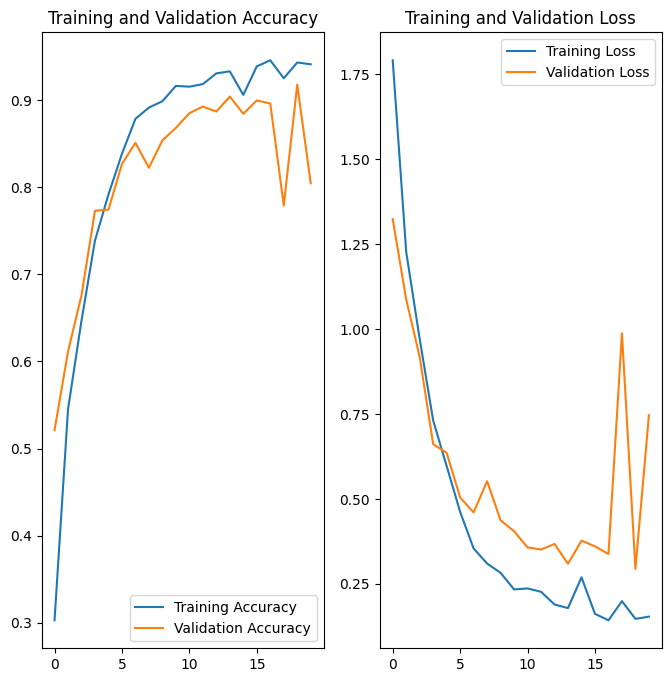

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# From the visualization below, at first the accuracy of training and validation are increasing together in the first epochs
# But as the epochs increased, the accuracy for validation increased slowly. This was the case of overfitting

### Findings


From the visualization below, at first the accuracy of training and validation are increasing together in the first epochs
But as the epochs increased, the accuracy for validation increased slowly. This was the case of overfitting

### Proposed Solution



*   We tried to use dropouts first as part of regularization
*   We tried to combine with Augmentor library too



## Model Development (Second Iteration)


In [39]:
# As the first solution, we used dropout first. Other hyperparamaters are the same
model = Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))

#First Convulation layer
model.add(layers.Conv2D(16,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#Second Convulation Layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#Third Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())


#Dense Layer
model.add(layers.Dense(64,activation='relu'))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 89, 89, 16)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 89, 89, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                  

### Compiling the model

In [40]:
# Compiling the model with the same logic and condition as above
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


### Training the model

We trained the model with the new CNN arch (added Dropout)

In [41]:


epochs = 20

history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/20
394/394 [==============================] - 7s 14ms/step - loss: 1.6631 - accuracy: 0.3656 - val_loss: 1.4394 - val_accuracy: 0.4722
Epoch 2/20
394/394 [==============================] - 5s 13ms/step - loss: 1.3020 - accuracy: 0.5064 - val_loss: 1.1549 - val_accuracy: 0.5959
Epoch 3/20
394/394 [==============================] - 5s 13ms/step - loss: 1.0726 - accuracy: 0.6014 - val_loss: 1.0763 - val_accuracy: 0.6022
Epoch 4/20
394/394 [==============================] - 5s 13ms/step - loss: 0.9105 - accuracy: 0.6692 - val_loss: 0.9583 - val_accuracy: 0.6582
Epoch 5/20
394/394 [==============================] - 5s 13ms/step - loss: 0.7641 - accuracy: 0.7154 - val_loss: 0.7469 - val_accuracy: 0.7285
Epoch 6/20
394/394 [==============================] - 5s 13ms/step - loss: 0.6418 - accuracy: 0.7648 - val_loss: 0.6461 - val_accuracy: 0.7698
Epoch 7/20
394/394 [==============================] - 5s 13ms/step - loss: 0.5449 - accuracy: 0.7981 - val_loss: 0.5533 - val_accuracy: 0.8019

### Visualizing the results

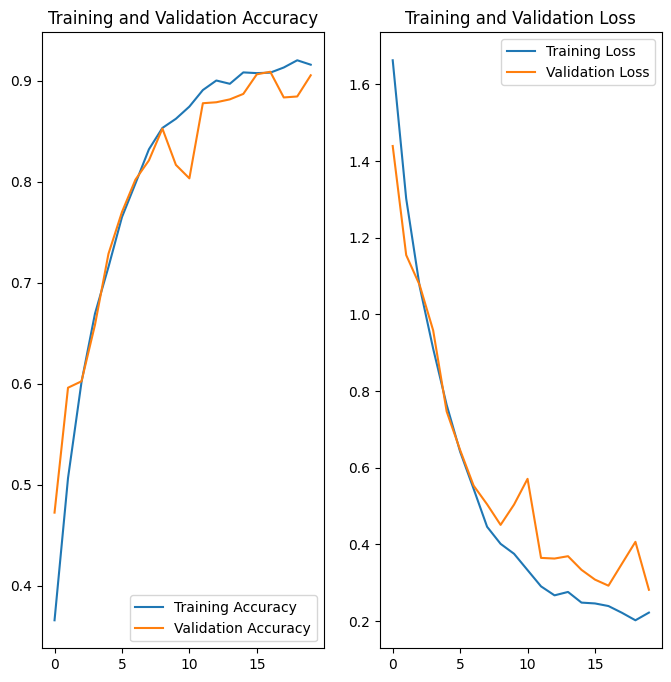

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

From the above result, we could see that the accuracy gap between training and validation improved (gap smaller). That means dropout helped the CNN to avoid overfitting. However, as we found imbalanced class earlier, we could handle this too to improve the accuracy gap

## Model Development (3rd Iteration)

**Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<Axes: xlabel='contribution_pct', ylabel='class_name'>

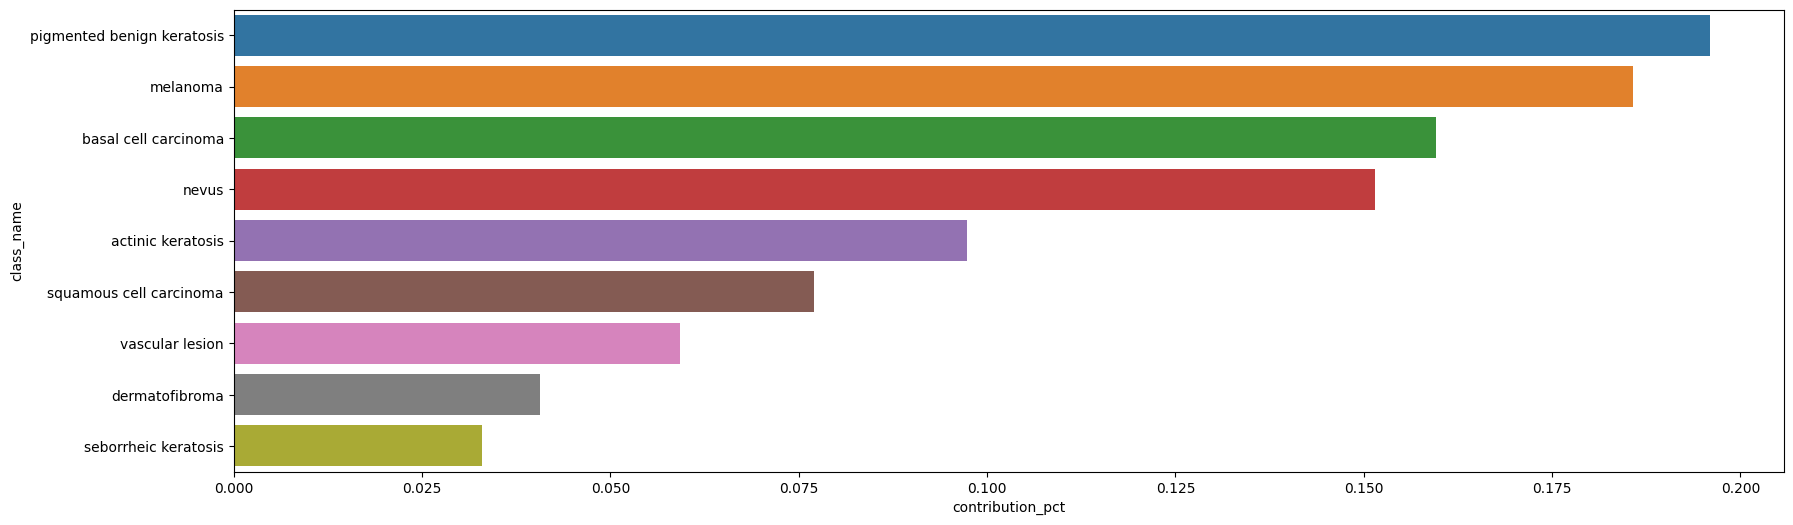

In [47]:
## From below viz, we could see that there was an imbalanced class

import seaborn as sns
plt.figure(figsize=(20, 6))
sns.barplot(x="contribution_pct", y="class_name", data=new_dat)

From below viz, we could see that there was an imbalanced class. Pigmented Benign Keratosis and Melanoma are the highest

**Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [48]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [49]:
path_to_training_dataset="/content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FC0934ACB20>: 100%|██████████| 500/500 [00:09<00:00, 53.38 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FC09346E790>: 100%|██████████| 500/500 [00:09<00:00, 52.58 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC093467A30>: 100%|██████████| 500/500 [00:10<00:00, 48.01 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=962x674 at 0x7FC093465CD0>: 100%|██████████| 500/500 [00:45<00:00, 11.04 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7FC092C37EB0>: 100%|██████████| 500/500 [00:43<00:00, 11.58 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC0CE739550>: 100%|██████████| 500/500 [00:10<00:00, 49.45 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FC0CE644AF0>: 100%|██████████| 500/500 [00:23<00:00, 21.40 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC0CE5B07F0>: 100%|██████████| 500/500 [00:09<00:00, 52.88 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC0CE4EEAF0>: 100%|██████████| 500/500 [00:09<00:00, 50.90 Samples/s]


By having this augmentor, we could increase the rows or samples so that we would have more data points.

In [50]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

17986


Train the model on the data created using Augmentor

In [56]:
batch_size = 32
img_height = 180
img_width = 180

### Create a training dataset

In [57]:

train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size=32,
                                                               image_size=(180,180), label_mode='categorical',
                                                               seed=123,subset="training",
                                                               validation_split=0.2)

Found 20225 files belonging to 9 classes.
Using 16180 files for training.


###Create a validation dataset

In [58]:

val_ds =tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,
                                                            image_size=(180,180), label_mode='categorical',
                                                            seed=123,subset="validation",
                                                            validation_split=0.2)

Found 20225 files belonging to 9 classes.
Using 4045 files for validation.


### Create your model (make sure to include normalization)

In [59]:
#Sequential allows you to create models layer-by-layer  
model = Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))

#First Convulation layer
model.add(layers.Conv2D(16,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#Second Convulation Layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#Third Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())


#Dense Layer
model.add(layers.Dense(64,activation='relu'))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 89, 89, 16)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 89, 89, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                  

### Compile your model (Choose optimizer and loss function appropriately)

In [60]:
## your code goes here


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Train your model

In [61]:
epochs = 50
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/50
506/506 [==============================] - 51s 96ms/step - loss: 1.7915 - accuracy: 0.3138 - val_loss: 1.4702 - val_accuracy: 0.4734
Epoch 2/50
506/506 [==============================] - 48s 94ms/step - loss: 1.2423 - accuracy: 0.5358 - val_loss: 1.1368 - val_accuracy: 0.5975
Epoch 3/50
506/506 [==============================] - 49s 95ms/step - loss: 0.9954 - accuracy: 0.6329 - val_loss: 0.8707 - val_accuracy: 0.6902
Epoch 4/50
506/506 [==============================] - 49s 96ms/step - loss: 0.8141 - accuracy: 0.7022 - val_loss: 0.7158 - val_accuracy: 0.7478
Epoch 5/50
506/506 [==============================] - 49s 95ms/step - loss: 0.6376 - accuracy: 0.7705 - val_loss: 0.5875 - val_accuracy: 0.7963
Epoch 6/50
506/506 [==============================] - 49s 96ms/step - loss: 0.5334 - accuracy: 0.8035 - val_loss: 0.5542 - val_accuracy: 0.8077
Epoch 7/50
506/506 [==============================] - 49s 96ms/step - loss: 0.4587 - accuracy: 0.8320 - val_loss: 0.4140 - val_accuracy:

###  Visualize the model results

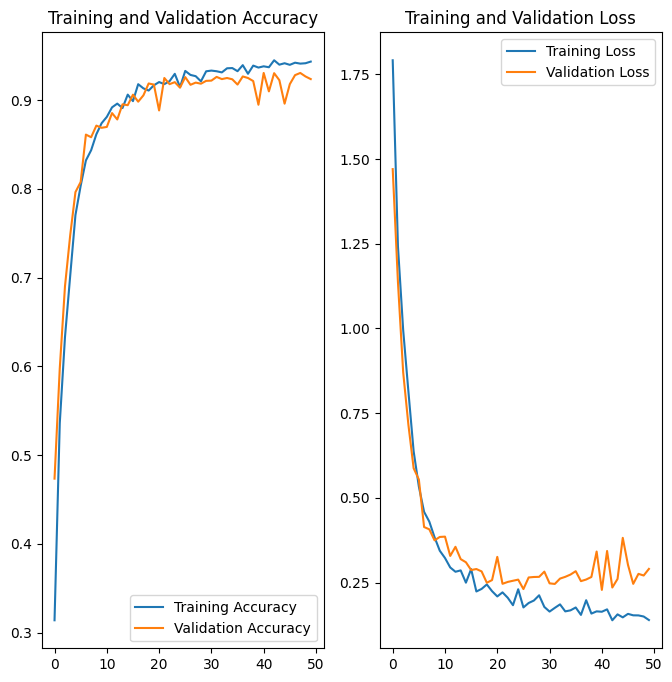

In [62]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

After we implemented augmentor, now we had smaller gap of accuracy between validation and training, with a high accuracy as well for both of them

# Model Prediction for Implementation



```
Here, we included the implementation code after we have fitted the model above.
```



1/1 [==============================] - 0s 20ms/step
This image is predicted as : melanoma


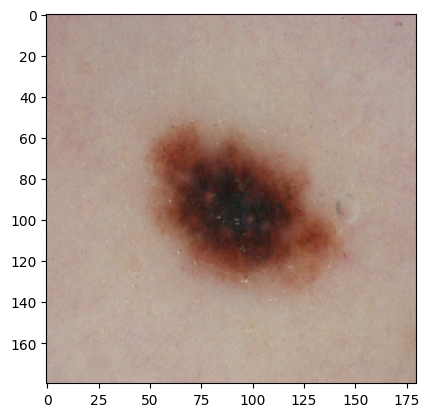

In [97]:
#below is the code to predict the inputted image link/directory. We show the predicted class and the image too

image_directory_link_sample = '/content/gdrive/MyDrive/CNN/Skin cancer ISIC The International Skin Imaging Collaboration/Implementation_Sample/ISIC_0000141.jpg'
Test_image = load_img(image_directory_link_sample,target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("This image is predicted as :", pred_class)

In [98]:
pred

3